In [1]:

import pandas as pd
import numpy as np
import matplotlib as plt
import sklearn
from sklearn.model_selection import train_test_split


In [2]:
ger = pd.read_csv('german_credit_data.csv')
ger.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [3]:
# Drop the Saving accounts and Checking account columns - we don't care about em
ger = ger.drop(columns=['Saving accounts', 'Checking account', 'Unnamed: 0'])
# Drop anything without value and the result is in place of ger
ger.fillna(ger.mean(),inplace=True)
ger.head()

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,1169,6,radio/TV,good
1,22,female,2,own,5951,48,radio/TV,bad
2,49,male,1,own,2096,12,education,good
3,45,male,2,free,7882,42,furniture/equipment,good
4,53,male,2,free,4870,24,car,bad


In [4]:
# Initialize empty df then concatcolumn values as new columns
encodedDF = pd.DataFrame()
encodedDF = pd.concat([encodedDF, pd.get_dummies(ger['Sex'], prefix = 'Gender'),
                      pd.get_dummies(ger['Job'], prefix = 'Job'),
                      pd.get_dummies(ger['Housing'], prefix = 'Housing'),
                      pd.get_dummies(ger['Purpose'], prefix = 'Purpose')],axis=1)
encodedDF.head()

,Gender_female,Gender_male,Job_0,Job_1,Job_2,Job_3,Housing_free,Housing_own,Housing_rent,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
3,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0


In [5]:
# Encode the risk to make a risk label
from sklearn.preprocessing import LabelEncoder
# Initialize label encoder
le = LabelEncoder()
# Needs to be fitted
le.fit(ger['Risk'])
# Encode the Risk from the OG df, save in encoded df
encodedDF['Risk_Label'] = le.transform(ger['Risk']) 

In [6]:
# Grabs every row from every column except the last one (our label)
features = encodedDF.iloc[:, :-1]
labels = encodedDF['Risk_Label']

In [7]:
# Run train test split of the dataframes, using 30% test
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = .30)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knnClassifier = KNeighborsClassifier(n_neighbors=5)

In [9]:
from sklearn.tree import DecisionTreeClassifier
decTree = DecisionTreeClassifier()

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [10]:
from sklearn import svm
svm= svm.SVC(gamma='scale')

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial')

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
from sklearn.model_selection import cross_val_score


In [13]:
# Function to make the prediction and show the relevant statistics
def prediction(model):
    # Fit the model
    model.fit(X_train, y_train)
    # Predict the test values
    pred = model.predict(X_test)
    # Undo the scale and transform
    pred = le.inverse_transform(pred)
    # Generate the Classification report
    classReport = classification_report(le.inverse_transform(y_test), pred)
    #classReport = classification_report(y_test, pred)
    print('Classification Report')
    print(classReport)
    # X validation score
    xValScore = cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy")
    print('Cross Validation Score')
    print(xValScore)
    # Make the confusion matrix
    cfMatrix = confusion_matrix(le.inverse_transform(y_test), pred, labels = ['good', 'bad'])
    print("Confusion Matrix")
    print(cfMatrix)
    # Graph the confusion matrix using seaborn
    sn.heatmap(cfMatrix, annot=True)


KNN
Classification Report
              precision    recall  f1-score   support

         bad       0.28      0.13      0.18       100
        good       0.66      0.83      0.73       200

    accuracy                           0.60       300
   macro avg       0.47      0.48      0.45       300
weighted avg       0.53      0.60      0.55       300

Cross Validation Score
[0.63675214 0.63675214 0.63793103]
Confusion Matrix
[[166  34]
 [ 87  13]]


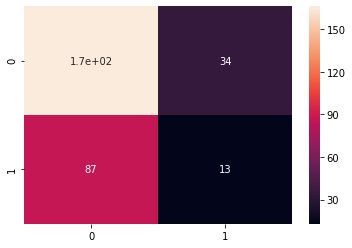

In [14]:
print("KNN")
prediction(knnClassifier)

Decision Tree
Classification Report
              precision    recall  f1-score   support

         bad       0.29      0.14      0.19       100
        good       0.66      0.83      0.73       200

    accuracy                           0.60       300
   macro avg       0.48      0.48      0.46       300
weighted avg       0.54      0.60      0.55       300

Cross Validation Score
[0.65384615 0.67094017 0.69827586]
Confusion Matrix
[[166  34]
 [ 86  14]]


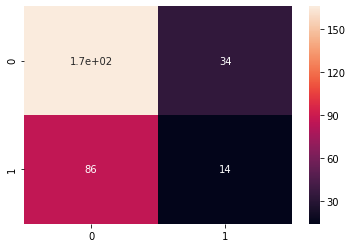

In [15]:
print("Decision Tree")
prediction(decTree)

GNB
Classification Report
              precision    recall  f1-score   support

         bad       0.38      0.27      0.32       100
        good       0.68      0.78      0.73       200

    accuracy                           0.61       300
   macro avg       0.53      0.53      0.52       300
weighted avg       0.58      0.61      0.59       300

Cross Validation Score
[0.64102564 0.68376068 0.71551724]
Confusion Matrix
[[156  44]
 [ 73  27]]


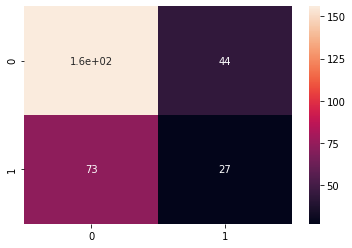

In [16]:
print("GNB")
prediction(gnb)

SVM
Classification Report
              precision    recall  f1-score   support

         bad       0.60      0.03      0.06       100
        good       0.67      0.99      0.80       200

    accuracy                           0.67       300
   macro avg       0.64      0.51      0.43       300
weighted avg       0.65      0.67      0.55       300

Cross Validation Score
[0.69230769 0.7008547  0.71551724]
Confusion Matrix
[[198   2]
 [ 97   3]]


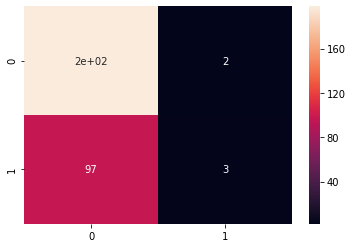

In [17]:
print("SVM")
prediction(svm)

Logistic Regression
Classification Report
              precision    recall  f1-score   support

         bad       0.50      0.03      0.06       100
        good       0.67      0.98      0.80       200

    accuracy                           0.67       300
   macro avg       0.59      0.51      0.43       300
weighted avg       0.61      0.67      0.55       300

Cross Validation Score
[0.6965812  0.72222222 0.71551724]
Confusion Matrix
[[197   3]
 [ 97   3]]


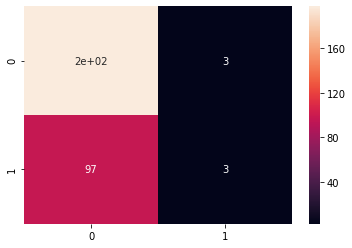

In [18]:
print("Logistic Regression")
prediction(lr)

In [19]:
from sklearn.preprocessing import StandardScaler
# Initialize Standard Scaler
scaler = StandardScaler()
# Fit the training data
scaler.fit(X_train)
# Scale the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



KNN
Classification Report
              precision    recall  f1-score   support

         bad       0.27      0.14      0.18       100
        good       0.65      0.81      0.72       200

    accuracy                           0.59       300
   macro avg       0.46      0.48      0.45       300
weighted avg       0.53      0.59      0.54       300

Cross Validation Score
[0.5982906  0.64102564 0.61637931]
Confusion Matrix
[[162  38]
 [ 86  14]]


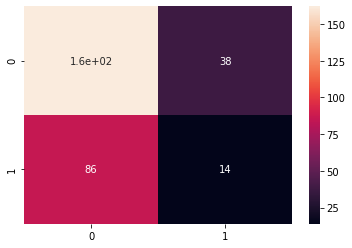

In [20]:
print("KNN")
prediction(knnClassifier)

Decision Tree
Classification Report
              precision    recall  f1-score   support

         bad       0.28      0.13      0.18       100
        good       0.66      0.83      0.73       200

    accuracy                           0.60       300
   macro avg       0.47      0.48      0.45       300
weighted avg       0.53      0.60      0.55       300

Cross Validation Score
[0.65811966 0.66239316 0.69827586]
Confusion Matrix
[[166  34]
 [ 87  13]]


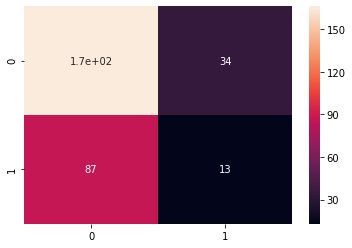

In [21]:
print("Decision Tree")
prediction(decTree)


GNB
Classification Report
              precision    recall  f1-score   support

         bad       0.38      0.27      0.32       100
        good       0.68      0.78      0.73       200

    accuracy                           0.61       300
   macro avg       0.53      0.53      0.52       300
weighted avg       0.58      0.61      0.59       300

Cross Validation Score
[0.64102564 0.68376068 0.71551724]
Confusion Matrix
[[156  44]
 [ 73  27]]


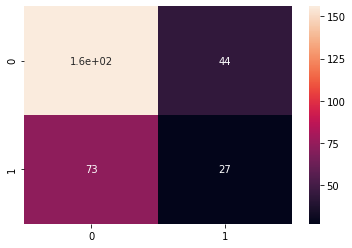

In [22]:
print("GNB")
prediction(gnb)

SVM
Classification Report
              precision    recall  f1-score   support

         bad       0.32      0.07      0.11       100
        good       0.67      0.93      0.77       200

    accuracy                           0.64       300
   macro avg       0.49      0.50      0.44       300
weighted avg       0.55      0.64      0.55       300

Cross Validation Score
[0.7008547  0.7008547  0.71551724]
Confusion Matrix
[[185  15]
 [ 93   7]]


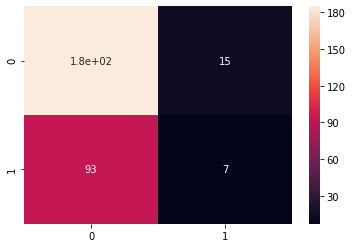

In [23]:
print("SVM")
prediction(svm)

Logistic Regression
Classification Report
              precision    recall  f1-score   support

         bad       0.43      0.03      0.06       100
        good       0.67      0.98      0.80       200

    accuracy                           0.66       300
   macro avg       0.55      0.51      0.43       300
weighted avg       0.59      0.66      0.55       300

Cross Validation Score
[0.69230769 0.70940171 0.71551724]
Confusion Matrix
[[196   4]
 [ 97   3]]


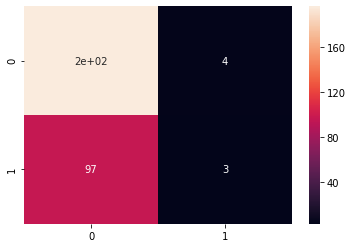

In [24]:
print("Logistic Regression")
prediction(lr)

In [25]:
# TODO make the Random forrrest with 1k trees

In [44]:
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

randForestModel = RandomForestRegressor(n_estimators=1000)
randForestModel.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [45]:
 prediction = randForestModel.predict(X_test)
# print(prediction
# Ours
print("RandomForestRegressor RMSE:",sqrt(mean_squared_error(y_test, prediction)))

RandomForestRegressor RMSE: 0.5065982787120776


In [ ]:
# TODO make the voting clasifier

In [32]:
from sklearn.ensemble import VotingClassifier
